In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk

In [2]:
#Read data
df=pd.read_csv("/kaggle/input/amazon-fine-food-reviews/Reviews.csv")
df

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...,...,...,...,...,...,...
568449,568450,B001EO7N10,A28KG5XORO54AY,Lettie D. Carter,0,0,5,1299628800,Will not do without,Great for sesame chicken..this is a good if no...
568450,568451,B003S1WTCU,A3I8AFVPEE8KI5,R. Sawyer,0,0,2,1331251200,disappointed,I'm disappointed with the flavor. The chocolat...
568451,568452,B004I613EE,A121AA1GQV751Z,"pksd ""pk_007""",2,2,5,1329782400,Perfect for our maltipoo,"These stars are small, so you can give 10-15 o..."
568452,568453,B004I613EE,A3IBEVCTXKNOH,"Kathy A. Welch ""katwel""",1,1,5,1331596800,Favorite Training and reward treat,These are the BEST treats for training and rew...


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      568454 non-null  int64 
 1   ProductId               568454 non-null  object
 2   UserId                  568454 non-null  object
 3   ProfileName             568428 non-null  object
 4   HelpfulnessNumerator    568454 non-null  int64 
 5   HelpfulnessDenominator  568454 non-null  int64 
 6   Score                   568454 non-null  int64 
 7   Time                    568454 non-null  int64 
 8   Summary                 568427 non-null  object
 9   Text                    568454 non-null  object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB


In [4]:
df.isnull().sum()

Id                         0
ProductId                  0
UserId                     0
ProfileName               26
HelpfulnessNumerator       0
HelpfulnessDenominator     0
Score                      0
Time                       0
Summary                   27
Text                       0
dtype: int64

In [5]:
df['Score'].value_counts()

Score
5    363122
4     80655
1     52268
3     42640
2     29769
Name: count, dtype: int64

<Axes: xlabel='Score', ylabel='count'>

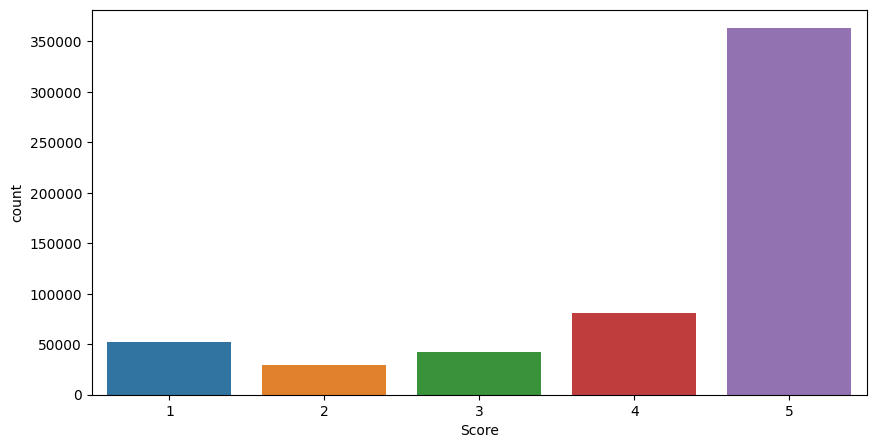

In [8]:
plt.figure(figsize=(10,5))
sns.countplot(x='Score',data=df)

In [6]:
'''
Basic NLTK
It contains all the tools and methods needed for tasks like tokenization, part-of-speech tagging, and named entity recognition.
'''
a=df['Text'][50]
a

"This oatmeal is not good. Its mushy, soft, I don't like it. Quaker Oats is the way to go."

In [7]:
#For tokenization: for splitting the about text we use work_tokenize
token= nltk.word_tokenize(a)
token

['This',
 'oatmeal',
 'is',
 'not',
 'good',
 '.',
 'Its',
 'mushy',
 ',',
 'soft',
 ',',
 'I',
 'do',
 "n't",
 'like',
 'it',
 '.',
 'Quaker',
 'Oats',
 'is',
 'the',
 'way',
 'to',
 'go',
 '.']

In [10]:
#parts of speech taging: to find the part of speech of each token data 
tagged= nltk.pos_tag(token)
tagged

[('This', 'DT'),
 ('oatmeal', 'NN'),
 ('is', 'VBZ'),
 ('not', 'RB'),
 ('good', 'JJ'),
 ('.', '.'),
 ('Its', 'PRP$'),
 ('mushy', 'NN'),
 (',', ','),
 ('soft', 'JJ'),
 (',', ','),
 ('I', 'PRP'),
 ('do', 'VBP'),
 ("n't", 'RB'),
 ('like', 'VB'),
 ('it', 'PRP'),
 ('.', '.'),
 ('Quaker', 'NNP'),
 ('Oats', 'NNPS'),
 ('is', 'VBZ'),
 ('the', 'DT'),
 ('way', 'NN'),
 ('to', 'TO'),
 ('go', 'VB'),
 ('.', '.')]

In [11]:
#named entity recognition: used for chunking, which is grouping words into syntactic units like noun phrases 
entities = nltk.chunk.ne_chunk(tagged)
entities.pprint()
#ne_chunk identifies entities like people, places, organizations,... in a text.
#The output is a tree structure so by using pprint() we can prints the resulting tree in to a human readable format.

(S
  This/DT
  oatmeal/NN
  is/VBZ
  not/RB
  good/JJ
  ./.
  Its/PRP$
  mushy/NN
  ,/,
  soft/JJ
  ,/,
  I/PRP
  do/VBP
  n't/RB
  like/VB
  it/PRP
  ./.
  (ORGANIZATION Quaker/NNP Oats/NNPS)
  is/VBZ
  the/DT
  way/NN
  to/TO
  go/VB
  ./.)


In [ ]:
'''
VADER (Valence Aware Dictionary and sEntiment Reasoner):
It is a sentiment analysis tool to analyze text for its sentiment polarity (positive, negative, neutral) and intensity.
Uses a bag of words approach:
1. removes stop words
2. each word is scored and combines the total score for the text
VADER uses a lexicon of words with predefined sentiment scores.
Eg: Words like "great" have a positive score, while words like "terrible" have a negative score.
Recognizes modifiers like intensifiers ("very happy" vs. "happy") or negations ("not good").
Doesnot require any training and can directly analyze the sentiment of text.
provides a compound score: A normalized score between -1 (most negative) and +1 (most positive).
'''

In [12]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm
#tqdm used to o monitor the progress of time-consuming operations like data processing, file downloads, or training machine learning models.

sia=SentimentIntensityAnalyzer()

In [ ]:
sia

In [15]:
sia.polarity_scores("I am so happy")

{'neg': 0.0, 'neu': 0.334, 'pos': 0.666, 'compound': 0.6115}

In [16]:
sia.polarity_scores("This is the worst thing ever")

{'neg': 0.451, 'neu': 0.549, 'pos': 0.0, 'compound': -0.6249}

In [17]:
a

"This oatmeal is not good. Its mushy, soft, I don't like it. Quaker Oats is the way to go."

In [18]:
sia.polarity_scores(a)

{'neg': 0.22, 'neu': 0.78, 'pos': 0.0, 'compound': -0.5448}

In [ ]:
pip install ipywidgets

In [ ]:
pip install twython

In [19]:
df['Sentiment Scores'] = df['Text'].apply(lambda x: sia.polarity_scores(x))


In [20]:
df['Sentiment Scores']

0         {'neg': 0.0, 'neu': 0.695, 'pos': 0.305, 'comp...
1         {'neg': 0.079, 'neu': 0.853, 'pos': 0.068, 'co...
2         {'neg': 0.091, 'neu': 0.754, 'pos': 0.155, 'co...
3         {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
4         {'neg': 0.0, 'neu': 0.552, 'pos': 0.448, 'comp...
                                ...                        
568449    {'neg': 0.072, 'neu': 0.6, 'pos': 0.327, 'comp...
568450    {'neg': 0.19, 'neu': 0.697, 'pos': 0.114, 'com...
568451    {'neg': 0.037, 'neu': 0.884, 'pos': 0.078, 'co...
568452    {'neg': 0.041, 'neu': 0.506, 'pos': 0.452, 'co...
568453    {'neg': 0.0, 'neu': 0.846, 'pos': 0.154, 'comp...
Name: Sentiment Scores, Length: 568454, dtype: object

In [21]:
df['Compound'] = df['Sentiment Scores'].apply(lambda x: x['compound'])
df['Positive'] = df['Sentiment Scores'].apply(lambda x: x['pos'])
df['Neutral'] = df['Sentiment Scores'].apply(lambda x: x['neu'])
df['Negative'] = df['Sentiment Scores'].apply(lambda x: x['neg'])

# Drop the 'Sentiment Scores' column if needed
df = df.drop(columns=['Sentiment Scores'])

In [22]:
df

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Compound,Positive,Neutral,Negative
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,0.9441,0.305,0.695,0.000
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,-0.1027,0.068,0.853,0.079
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,0.8265,0.155,0.754,0.091
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,0.0000,0.000,1.000,0.000
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,0.9468,0.448,0.552,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
568449,568450,B001EO7N10,A28KG5XORO54AY,Lettie D. Carter,0,0,5,1299628800,Will not do without,Great for sesame chicken..this is a good if no...,0.8589,0.327,0.600,0.072
568450,568451,B003S1WTCU,A3I8AFVPEE8KI5,R. Sawyer,0,0,2,1331251200,disappointed,I'm disappointed with the flavor. The chocolat...,-0.4848,0.114,0.697,0.190
568451,568452,B004I613EE,A121AA1GQV751Z,"pksd ""pk_007""",2,2,5,1329782400,Perfect for our maltipoo,"These stars are small, so you can give 10-15 o...",0.4352,0.078,0.884,0.037
568452,568453,B004I613EE,A3IBEVCTXKNOH,"Kathy A. Welch ""katwel""",1,1,5,1331596800,Favorite Training and reward treat,These are the BEST treats for training and rew...,0.9717,0.452,0.506,0.041


In [23]:
def classify_sentiment(compound_score):
    if compound_score >= 0.05:
        return "Positive"
    elif compound_score <= -0.05:
        return "Negative"
    else:
        return "Neutral"

df['Overall Sentiment'] = df['Compound'].apply(classify_sentiment)

In [24]:
df['Overall Sentiment']

0         Positive
1         Negative
2         Positive
3          Neutral
4         Positive
            ...   
568449    Positive
568450    Negative
568451    Positive
568452    Positive
568453    Positive
Name: Overall Sentiment, Length: 568454, dtype: object

<Axes: xlabel='Overall Sentiment', ylabel='count'>

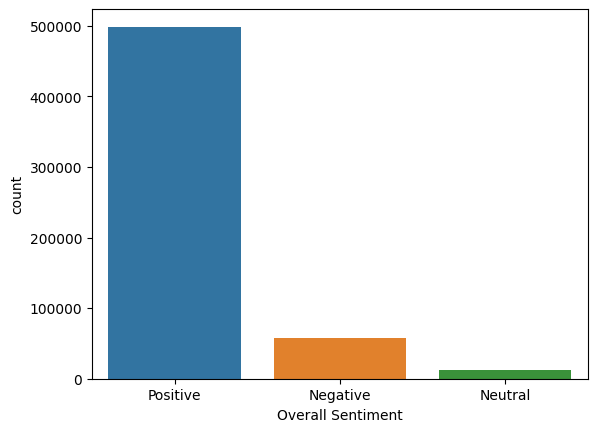

In [25]:
sns.countplot(x="Overall Sentiment", data=df)

In [ ]:
#running the polarity score on entire dataset
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    text = row['Text']
    myid = row['Id']
    res[myid] = sia.polarity_scores(text)